# Simple two layer neural network
__Code implented has inspiration from:__
- <cite>http://cs231n.github.io/assignments2018/assignment1/</cite>

The following is a simple two layer fully connected neural network, implemented to work with our images. The purpose of this notebook is to create and test accuracy of a simple two layer Neural Network.

### Method
1. The images from the following three categories _potato_, _catfood (salmon)_ and _table_ is imported. 
    1. The images have the following distribution:<br/>
    <div class="alert alert-block alert-warning">
    <b>Without dataagumentation</b><br/> 
    __potato:__ $\qquad$ $\;$ $\;$ $\,$ 205 images<br/>
    __catfood(salmon):__ $\!$ 100 images<br/>
    __table:__ $\qquad$ $\;$ $\;$ $\;$ $\,$ 200 images<br/>
    </div>
    <div class="alert alert-block alert-warning">
    <b>With dataagumentation</b><br/> 
    __potato:__ $\qquad$ $\;$ $\;$ $\,$ 205 images<br/>
    __catfood(salmon):__ $\!$ 100 images<br/>
    __table:__ $\qquad$ $\;$ $\;$ $\;$ $\,$ 200 images<br/>
    </div>
    lav billeder om i dataaugmented til ikke rezied
    2. These images loaded and shuffled into 3 matrices training -, validation - and test - images, to train and validate the built network. 


## Imports

In [1]:
import os
import random
import numpy as np
import matplotlib.pylab as plt
from glob import glob
from neural_net import TwoLayerNet
from image_import import import_images
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Importing images

### Making training, validation and test data 

In [2]:
SOURCE_IMAGES_POT = '/home/mikkel/Documents/github/BSc-PRO/images_1280x720/kartofler/still' # '/home/mikkel/Documents/github/BSc-PRO/imgs_resize/potato'
SOURCE_IMAGES_CAT = '/home/mikkel/Documents/github/BSc-PRO/images_1280x720/kat_laks/still' # '/home/mikkel/Documents/github/BSc-PRO/imgs_resize/catfood'
SOURCE_IMAGES_TAB = '/home/mikkel/Documents/github/BSc-PRO/images_1280x720/baggrund/bevægelse' # '/home/mikkel/Documents/github/BSc-PRO/imgs_resize/table

AUG_IMAGES_POT    = '/home/mikkel/Documents/github/BSc-PRO/DataAugment/potato'
AUG_IMAGES_CAT    = '/home/mikkel/Documents/github/BSc-PRO/DataAugment/catfood'
AUG_IMAGES_TAB    = '/home/mikkel/Documents/github/BSc-PRO/DataAugment/table'

images_pot        = glob(os.path.join(SOURCE_IMAGES_POT, "*.jpg"))
images_cat        = glob(os.path.join(SOURCE_IMAGES_CAT, "*.jpg"))
images_tab        = glob(os.path.join(SOURCE_IMAGES_TAB, "*.jpg"))

images_aug_pot    = glob(os.path.join(AUG_IMAGES_POT, "*.jpeg"))
images_aug_cat    = glob(os.path.join(AUG_IMAGES_CAT, "*.jpeg"))
images_aug_tab    = glob(os.path.join(AUG_IMAGES_TAB, "*.jpeg"))

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = import_images(images_pot, images_cat, images_tab)

## Training

### Train without dataaugmentation

In [19]:
input_size = 224 * 224 * 3
hidden_size = 500
num_classes = 3
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=32,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.3, verbose=True)

# Predict on the validation set

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 1000: loss 1.324407
iteration 100 / 1000: loss 0.906587
iteration 200 / 1000: loss 0.757895
iteration 300 / 1000: loss 0.641550
iteration 400 / 1000: loss 0.652173
iteration 500 / 1000: loss 0.683992
iteration 600 / 1000: loss 0.671622
iteration 700 / 1000: loss 0.658823
iteration 800 / 1000: loss 0.710098
iteration 900 / 1000: loss 0.751816
('Validation accuracy: ', 0.93)
('Test accuracy: ', 0.92)


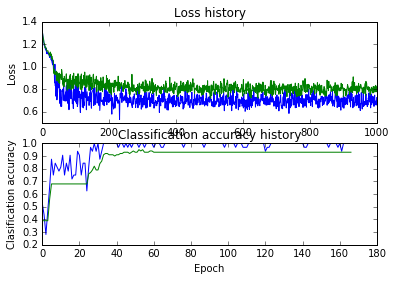

In [20]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'], label='train')
#plt.plot(stats['val_loss_history'], label='val')
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [ ]:
y_pred, score = net.predict(X_val, show_score=True)
print("Score: ", score[0:4])
print("Valdiation: ", y_val[0:4])
print("Prediction: ", y_pred[0:4])

### Train with dataaugmentation

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = import_images(images_aug_pot, images_cat, images_tab, 
                                                               augmented=True, path_aug_potato=images_aug_pot, 
                                                               path_aug_catfood=images_aug_cat, 
                                                               path_aug_table=images_aug_tab)

In [22]:
input_size = 224 * 224 * 3
hidden_size = 50
num_classes = 3
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=32,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.3, verbose=True)

# Predict on the validation set

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 1000: loss 1.121207
iteration 100 / 1000: loss 0.774746
iteration 200 / 1000: loss 0.698458
iteration 300 / 1000: loss 0.703545
iteration 400 / 1000: loss 0.658194
iteration 500 / 1000: loss 0.772060
iteration 600 / 1000: loss 0.756855
iteration 700 / 1000: loss 0.730411
iteration 800 / 1000: loss 0.658504
iteration 900 / 1000: loss 0.785097
('Validation accuracy: ', 0.93)
('Test accuracy: ', 0.93)


### Hyperparameter optimization

In [29]:
best_net = None # store the best model into this 
best_stats = None # store best stats to plot
stats_list = []
best_val = -1
results = {}

# Network properties
input_size = 224 * 224 * 3
num_classes = 3

# Hyperparameters
learning_rate = [1e-1] 
learning_rate_decay = [0.95]
regularization_strengths =  [0.3] 
hidden_layers = [50, 250, 500] 


for lr in learning_rate:
    for lrd in learning_rate_decay:
        for rs in regularization_strengths:
            for hl in hidden_layers:
                net = TwoLayerNet(input_size, hl, num_classes)

                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val, num_iters=1000, batch_size=35, learning_rate=lr, learning_rate_decay=lrd, reg=rs, verbose=True)
                stats_list.append(stats)
                y_train_pred = net.predict(X_train)
                y_val_pred = net.predict(X_val)
                
                # Calculates accuraccy
                y_train_acc = np.mean(y_train == y_train_pred)
                y_pred_acc = np.mean(y_val == y_val_pred)
                results[(lr, lrd, rs, hl)] = (y_train_acc, y_pred_acc) # stores results in tuple
                # Stores the best results
                if y_pred_acc > best_val:
                    best_val = y_pred_acc
                    best_net = net
                    best_stats = stats

for lr, lrd, rs, hl in sorted(results):
    train_accuracy, val_accuracy = results[(lr, lrd, rs, hl)]
    print('lr %e lrd %e rs %e hl %e train accuracy: %f val accuracy: %f' % (
                lr, lrd, rs, hl, train_accuracy, val_accuracy))                    

iteration 0 / 1000: loss 1.121197
iteration 100 / 1000: loss 0.817980
iteration 200 / 1000: loss 0.777115
iteration 300 / 1000: loss 0.776079
iteration 400 / 1000: loss 0.851127
iteration 500 / 1000: loss 0.746330
iteration 600 / 1000: loss 0.716747
iteration 700 / 1000: loss 0.700020
iteration 800 / 1000: loss 0.848263
iteration 900 / 1000: loss 0.695884
iteration 0 / 1000: loss 1.211509
iteration 100 / 1000: loss 0.724419
iteration 200 / 1000: loss 0.733942
iteration 300 / 1000: loss 0.694274
iteration 400 / 1000: loss 0.656006
iteration 500 / 1000: loss 0.747778
iteration 600 / 1000: loss 0.591454
iteration 700 / 1000: loss 0.715637
iteration 800 / 1000: loss 0.774671
iteration 900 / 1000: loss 0.744343
iteration 0 / 1000: loss 1.324461
iteration 100 / 1000: loss 0.779996
iteration 200 / 1000: loss 0.774252
iteration 300 / 1000: loss 0.720702
iteration 400 / 1000: loss 0.671425
iteration 500 / 1000: loss 0.688830
iteration 600 / 1000: loss 0.613663
iteration 700 / 1000: loss 0.61686

### Plot the best net

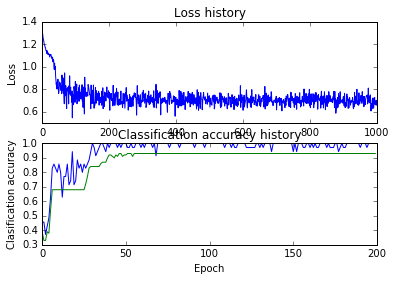

In [31]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

### Plot for all nets

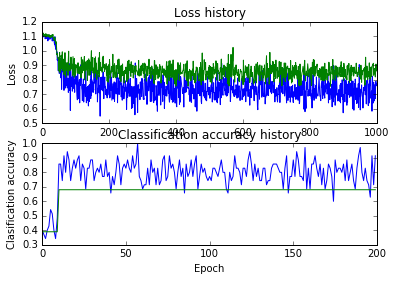

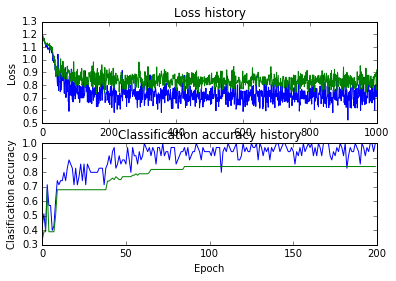

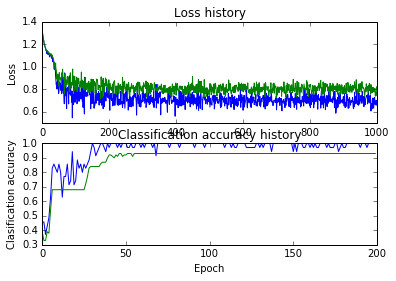

In [32]:
for s in stats_list:
    plt.subplot(2, 1, 1)
    plt.plot(s['loss_history'], label='train')
    plt.plot(s['val_loss_history'], label='val')
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(s['train_acc_history'], label='train')
    plt.plot(s['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()

### Saving best model's parameters

In [33]:
best_net.save_model()

AttributeError: 'TwoLayerNet' object has no attribute 'save_model'

## Using save parameters

### Loading saved parameters

In [ ]:
input_size = 224*224*3
hl = 500
num_classes = 3
saved_net = TwoLayerNet(input_size, hl, num_classes)
saved_net.load_model()

### Using model with saved parameters